# **First Approach**

in this method we considered silhouete score to hit the highest value possible

In [ ]:
pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=4f7114f0ae50a77d09e011b2503117ac71b1cc4083f4cd7c1110cc9be928324c
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [ ]:
pip install spacy

Fetching article: Data Science
Fetching article: Artificial intelligence
Fetching article: MachineLearning
Fetching article: European Central Bank
Fetching article: Bank
Fetching article: Financial technology
Fetching article: International Monetary Fund
Fetching article: Basketball
Fetching article: Swimming
Fetching article: Tenis


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(



Evaluating TF-IDF based clustering (Euclidean)...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

HDBSCAN with {'min_cluster_size': 3, 'metric': 'cosine'} failed: Unrecognized metric 'cosine'
HDBSCAN with {'min_cluster_size': 5, 'metric': 'cosine'} failed: Unrecognized metric 'cosine'
HDBSCAN with {'min_cluster_size': 7, 'metric': 'cosine'} failed: Unrecognized metric 'cosine'

Evaluating Embeddings-UMAP based clustering (Cosine)...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

HDBSCAN with {'min_cluster_size': 3, 'metric': 'cosine'} failed: Unrecognized metric 'cosine'
HDBSCAN with {'min_cluster_size': 5, 'metric': 'cosine'} failed: Unrecognized metric 'cosine'
HDBSCAN with {'min_cluster_size': 7, 'metric': 'cosine'} failed: Unrecognized metric 'cosine'


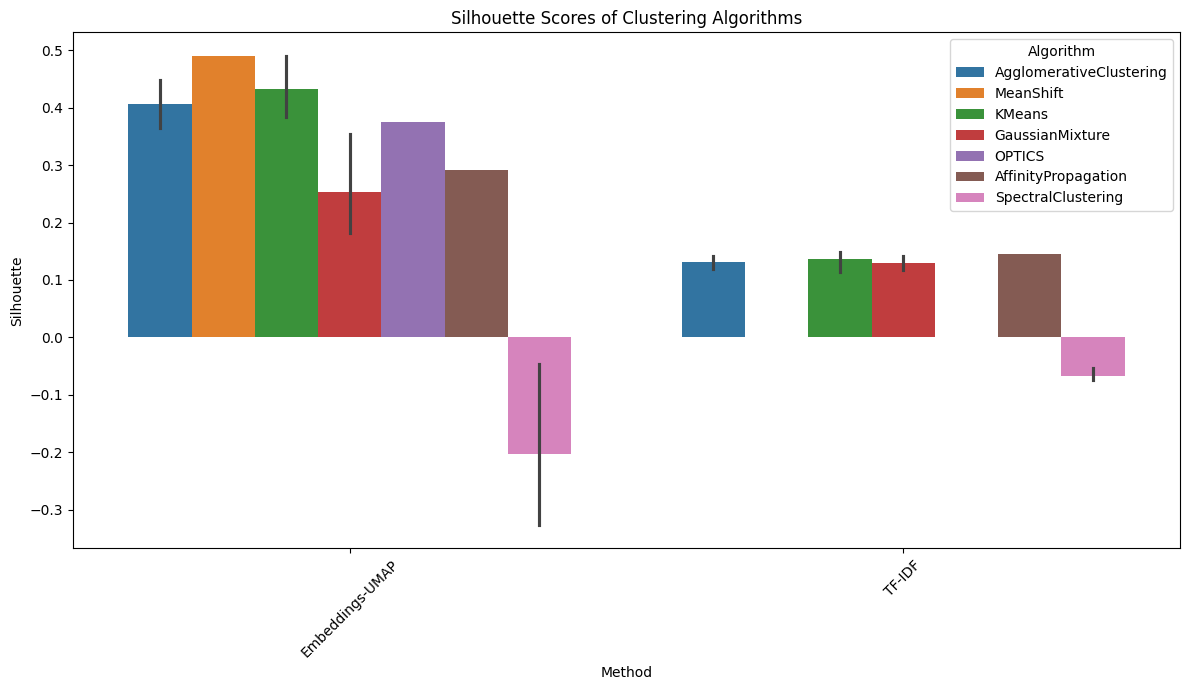

             Method                Algorithm  \
27  Embeddings-UMAP  AgglomerativeClustering   
34  Embeddings-UMAP                MeanShift   
22  Embeddings-UMAP                   KMeans   
25  Embeddings-UMAP  AgglomerativeClustering   
26  Embeddings-UMAP  AgglomerativeClustering   
23  Embeddings-UMAP                   KMeans   
28  Embeddings-UMAP  AgglomerativeClustering   
29  Embeddings-UMAP  AgglomerativeClustering   
40  Embeddings-UMAP          GaussianMixture   
41  Embeddings-UMAP          GaussianMixture   
32  Embeddings-UMAP  AgglomerativeClustering   
31  Embeddings-UMAP  AgglomerativeClustering   
24  Embeddings-UMAP                   KMeans   
36  Embeddings-UMAP                   OPTICS   
33  Embeddings-UMAP  AgglomerativeClustering   
30  Embeddings-UMAP  AgglomerativeClustering   
35  Embeddings-UMAP      AffinityPropagation   
44  Embeddings-UMAP          GaussianMixture   
45  Embeddings-UMAP          GaussianMixture   
43  Embeddings-UMAP          GaussianMix

In [ ]:
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, AffinityPropagation, OPTICS
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize
import umap
import hdbscan
import wikipedia
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering


articles = [
    'Data Science', 'Artificial intelligence', 'MachineLearning',
    'European Central Bank', 'Bank', 'Financial technology',
    'International Monetary Fund', 'Basketball', 'Swimming', 'Tenis'
]
titles = []
raw_articles = []

for article in articles:
    try:
        print(f"Fetching article: {article}")
        content = wikipedia.page(article).content
        raw_articles.append(content)
        titles.append(article)
    except Exception as e:
        print(f"Failed to fetch: {article} - {e}")


#preprocessing

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

def clean_and_lemmatize(text):
    text = normalize_text(text)
    doc = nlp(text)
    return " ".join(token.lemma_ for token in doc if not token.is_stop and token.is_alpha and len(token) > 2)



clean_articles = [clean_and_lemmatize(text) for text in raw_articles]

#TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(clean_articles)
X_tfidf_dense = X_tfidf.toarray()

# sentence transformer embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
X_embed = model.encode(clean_articles, convert_to_numpy=True)

#UMAP Dimensionality Reduction
reducer = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=42)
X_umap = reducer.fit_transform(X_embed)
X_umap_norm = normalize(X_umap, norm='l2')

# testing different clustering Algorithms
clustering_algorithms = {
    'KMeans': {
        'model': KMeans,
        'params': [{'n_clusters': k, 'n_init': 10, 'max_iter': 300, 'random_state': 42} for k in range(3, 6)]
    },
    'AgglomerativeClustering': {
        'model': AgglomerativeClustering,
        'params': [
            {'n_clusters': k, 'linkage': l}
            for k in range(3, 6) for l in ['ward', 'complete', 'average']
        ]
    },
    'DBSCAN': {
        'model': DBSCAN,
        'params': [{'eps': e, 'min_samples': m, 'metric': 'cosine'} for e in [0.5, 1.0, 1.5] for m in [3, 5]]
    },
    'MeanShift': {
        'model': MeanShift,
        'params': [{}]
    },
    'AffinityPropagation': {
        'model': AffinityPropagation,
        'params': [{}]
    },
    'HDBSCAN': {
        'model': hdbscan.HDBSCAN,
        'params': [{'min_cluster_size': ms, 'metric': 'cosine'} for ms in [3, 5, 7]]
    },
    'OPTICS': {
        'model': OPTICS,
        'params': [{'min_samples': ms, 'metric': 'cosine'} for ms in [3, 5]]
    },
    'SpectralClustering': {
    'model': SpectralClustering,
    'params': [{'n_clusters': k, 'affinity': 'nearest_neighbors'} for k in range(3, 6)]
    },
    'GaussianMixture':{
    'model': GaussianMixture,
    'params': [{'n_components': k, 'covariance_type': c, 'random_state': 42}
               for k in range(3, 6) for c in ['full', 'tied']]}

}

#validation func
def evaluate(X, method_name, metric='euclidean'):
    results = []
    for algo_name, config in clustering_algorithms.items():
        for params in config['params']:
            try:
                if 'metric' in config['model'].__init__.__code__.co_varnames and 'metric' not in params:
                    params['metric'] = metric
                model = config['model'](**params)
                labels = model.fit_predict(X)
                unique_labels = set(labels)
                if len(unique_labels) <= 1 or (len(unique_labels) == 2 and -1 in unique_labels):
                    continue
                sil = silhouette_score(X, labels, metric=metric)
                cal = calinski_harabasz_score(X, labels)
                dbi = davies_bouldin_score(X, labels)
                results.append({
                    'Method': method_name,
                    'Algorithm': algo_name,
                    'Params': str(params),
                    'Silhouette': sil,
                    'Calinski-Harabasz': cal,
                    'Davies-Bouldin': dbi
                })
            except Exception as e:
                print(f"{algo_name} with {params} failed: {e}")
    return results



print("\nEvaluating TF-IDF based clustering (Euclidean)...")
results_tfidf = evaluate(X_tfidf_dense, 'TF-IDF', metric='euclidean')
print("\nEvaluating Embeddings-UMAP based clustering (Cosine)...")
results_embed = evaluate(X_umap_norm, 'Embeddings-UMAP', metric='cosine')

# Combine and plot
results_df = pd.DataFrame(results_tfidf + results_embed)
results_df.sort_values(by='Silhouette', ascending=False, inplace=True)

plt.figure(figsize=(12, 7))
sns.barplot(data=results_df, x='Method', y='Silhouette', hue='Algorithm')
plt.title('Silhouette Scores of Clustering Algorithms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(results_df[['Method', 'Algorithm', 'Params', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']])


# get the best model and retrain for getting results
print("\n Best clustering result based on Silhouette score:")

best_result = results_df.iloc[0]
best_algo = best_result['Algorithm']
best_params = eval(best_result['Params'])
best_method = best_result['Method']

X_data = X_tfidf_dense if best_method == 'TF-IDF' else X_umap_norm
best_model_class = clustering_algorithms[best_algo]['model']

if 'metric' in best_model_class.__init__.__code__.co_varnames and 'metric' not in best_params:
    best_params['metric'] = 'cosine' if best_method != 'TF-IDF' else 'euclidean'

try:
    best_model = best_model_class(**best_params)
    best_labels = best_model.fit_predict(X_data)

    print(f"\n {best_algo} on {best_method} features with params:\n{best_params}\n")
    for title, label in zip(titles, best_labels):
        print(f"{title}: cluster {label}")
except Exception as e:
    print(f"failed to fit best model: {e}")



# **Second approach**

in this method we considered best possible clustering



In [ ]:
articles=['Data Science','Artificial intelligence','MachineLearning','European Central Bank','Bank','Financial technology','International Monetary Fund','Basketball','Swimming','Tenis']
wiki_list=[]
title=[]
for article in articles:
    print(f'Loading content: {article}')
    wiki_list.append(wikipedia.page(article).content)
    title.append(article)


Loading content: Data Science
Loading content: Artificial intelligence
Loading content: MachineLearning
Loading content: European Central Bank
Loading content: Bank
Loading content: Financial technology
Loading content: International Monetary Fund
Loading content: Basketball
Loading content: Swimming
Loading content: Tenis


In [ ]:
# extracting Stop Words
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words

In [ ]:
#convert text data into TF-IDF feature vectors while removing stop words
vectorizer = TfidfVectorizer(stop_words=list(stop_words))
X = vectorizer.fit_transform(wiki_list)
X[0]

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 358 stored elements and shape (1, 8914)>

In [ ]:
#different linkage methods for Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

X_dense = X.toarray()

linkage_methods = ['ward', 'single', 'complete', 'average']
best_linkage = None
best_score = -1
best_k = 2
best_labels = None

print("Evaluating linkage methods:\n")

for method in linkage_methods:
    print(f"\nLinkage: {method}")
    try:
        linkage_matrix = linkage(X_dense, method=method)

        for k in range(2, 10):
            model = AgglomerativeClustering(n_clusters=k, linkage=method)
            labels = model.fit_predict(X_dense)
            score = silhouette_score(X_dense, labels)
            print(f"k = {k}, Silhouette Score = {score:.2f}")

            if score > best_score:
                best_score = score
                best_k = k
                best_linkage = method
                best_labels = labels
    except Exception as e:
        print(f"Error for linkage '{method}':", e)



Evaluating linkage methods:


Linkage: ward
k = 2, Silhouette Score = 0.05
k = 3, Silhouette Score = 0.06
k = 4, Silhouette Score = 0.07
k = 5, Silhouette Score = 0.07
k = 6, Silhouette Score = 0.06
k = 7, Silhouette Score = 0.06
k = 8, Silhouette Score = 0.04
k = 9, Silhouette Score = 0.02

Linkage: single
k = 2, Silhouette Score = 0.03
k = 3, Silhouette Score = 0.05
k = 4, Silhouette Score = 0.04
k = 5, Silhouette Score = 0.07
k = 6, Silhouette Score = 0.06
k = 7, Silhouette Score = 0.06
k = 8, Silhouette Score = 0.04
k = 9, Silhouette Score = 0.02

Linkage: complete
k = 2, Silhouette Score = 0.03
k = 3, Silhouette Score = 0.06
k = 4, Silhouette Score = 0.07
k = 5, Silhouette Score = 0.07
k = 6, Silhouette Score = 0.06
k = 7, Silhouette Score = 0.06
k = 8, Silhouette Score = 0.04
k = 9, Silhouette Score = 0.02

Linkage: average
k = 2, Silhouette Score = 0.03
k = 3, Silhouette Score = 0.05
k = 4, Silhouette Score = 0.07
k = 5, Silhouette Score = 0.07
k = 6, Silhouette Score = 0.06
k =

In [ ]:
# text embedding using Sentence-BERT and apply K-Means clustering
bert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

bert_embeddings = bert_model.encode(wiki_list)

best_score = -1
best_labels = None
best_params = {}

for k in range(2, 10):
    for init in ['k-means++', 'random']:
        kmeans = KMeans(n_clusters=k, init=init, n_init=10, max_iter=200, random_state=42)
        labels = kmeans.fit_predict(bert_embeddings)
        score = silhouette_score(bert_embeddings, labels)

        if score > best_score:
            best_score = score
            best_labels = labels
            best_params = {'n_clusters': k, 'init': init}

df_bert = pd.DataFrame({'title': title, 'cluster': best_labels})
print(f"BERT + KMeans:\n{df_bert.sort_values(by='cluster')}")
print("\nBest Params (BERT + KMeans):", best_params)
print(f"Best Silhouette Score (BERT): { best_score:.2f}")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BERT + KMeans:
                         title  cluster
7                   Basketball        0
9                        Tenis        0
5         Financial technology        1
3        European Central Bank        1
6  International Monetary Fund        1
2              MachineLearning        2
0                 Data Science        2
1      Artificial intelligence        2
8                     Swimming        3
4                         Bank        4

Best Params (BERT + KMeans): {'n_clusters': 5, 'init': 'k-means++'}
Best Silhouette Score (BERT): 0.10


In [ ]:
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
bert_embeddings = bert_model.encode(wiki_list)

best_score = -1
best_labels = None
best_params = {}

for k in range(2, 10):
    for init in ['k-means++', 'random']:
        kmeans = KMeans(n_clusters=k, init=init, n_init=10, max_iter=300, random_state=42)
        labels = kmeans.fit_predict(bert_embeddings)
        score = silhouette_score(bert_embeddings, labels)

        if score > best_score:
            best_score = score
            best_labels = labels
            best_params = {'n_clusters': k, 'init': init}

df_bert = pd.DataFrame({'title': title, 'cluster': best_labels})
print(f"BERT + KMeans:\n{df_bert.sort_values(by='cluster')}")
print("\nBest Params (BERT + KMeans):", best_params)
print(f"Best Silhouette Score (BERT): { best_score:.2f}")


BERT + KMeans:
                         title  cluster
3        European Central Bank        0
6  International Monetary Fund        0
4                         Bank        1
7                   Basketball        1
9                        Tenis        1
8                     Swimming        1
2              MachineLearning        2
1      Artificial intelligence        2
5         Financial technology        2
0                 Data Science        2

Best Params (BERT + KMeans): {'n_clusters': 3, 'init': 'k-means++'}
Best Silhouette Score (BERT): 0.14
